# Williams_Lake_EQ_Centre_bettle_survey_june252016_analysis_experiments
- Using NVDI to "find" local current attack features in survey images
- ? can NVDI provide earlier or "new attack" or plain weak tree markings

## Steps:
- tag RGB photos in digikam
  - no_attack
  - current_attack
  - old_attack
- tag NIR photos in digikam
  - no_attack
  - ? new_attack
  - current_attack
  - old_attack
- build catalogue of local current attack feature images for training & testing
  - use GIMP to select out current attack tree images
    - save with original image name + feature centre xy pixel address

### notes & ideas
- locate suspected attack features with rgb & gray-scale images
- sift through nir images to find same features via geolocation
- calculate NVDI on features
- ? am I getting this reversed, aka need to use NVDI to locate possible early attack features

- alternative route:  stitch RGB & NIR gelocated images, then run NVDI on whole survey image
  - ? memory use of this large an image
  - ? could the stiched image then be recarved back up into tiles that exactly overlay RGB & NIR data

Williams Lake, Eagle View north above Equestrian Centre June252016 UAV survey
current attack RGB images
- 2016_0626_001750_256.JPG
- 2016_0626_001811_268.JPG

current attack NIR images
- 2016_0626_001750_258


In [53]:
import numpy as np
import mahotas as mh
from pylab import imshow
# import sklearn as skl

### Display example images for reference

In [75]:
# current attack image
image_rgb_current_attack = "/home/pms/data/surveys/BC/williams_lake_eagle_view_eq_centre_north_survey_june25201616350102/photos/mapir_rgb.working/2016_0626_001750_256.JPG"
image_nir_current_attack = "/home/pms/data/surveys/BC/williams_lake_eagle_view_eq_centre_north_survey_june25201616350102/photos/mapir_nir.working/2016_0626_001750_258.JPG"
# non-attack image
image_rgb_no_attack = "/home/pms/data/surveys/BC/williams_lake_eagle_view_eq_centre_north_survey_june25201616350102/photos/mapir_rgb.working/2016_0626_002218_406.JPG"

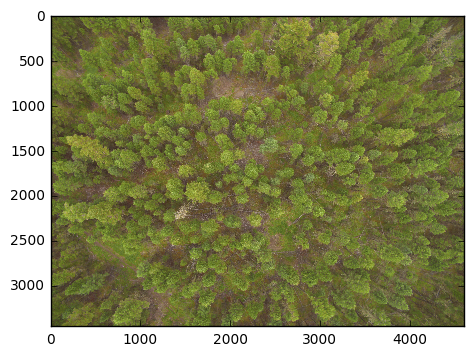

In [76]:
# import general non-attack rgb image
image = image_rgb_no_attack
image_rgb = mh.imread(image)
# display the image
from matplotlib import pyplot as plt
plt.imshow(image_rgb)
plt.show()

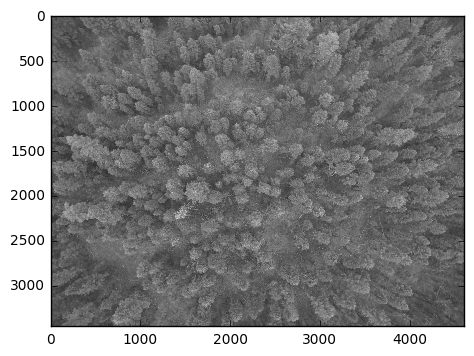

In [70]:
# create image as gray scale
# http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
# this throws "AttributeError: 'str' object has no attribute 'ndim'" error
# image_gs = mh.colors.rgb2gray(image) #, dtype=np.uint8)
# used Pillow instead
from PIL import Image
image_gs = Image.open(image).convert('LA')
plt.imshow(image_gs)
plt.show()

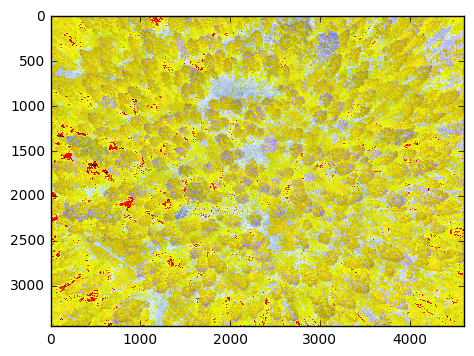

In [71]:
# create image filtered for mean
image_rgb_mean = image_rgb - image_rgb.mean()
plt.imshow(image_rgb_mean)
plt.show()

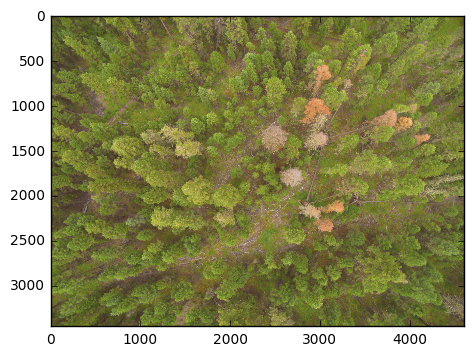

In [72]:
# import general current-attack rgb image
image = image_rgb_current_attack
image_rgb = mh.imread(image)
# display the image
from matplotlib import pyplot as plt
plt.imshow(image_rgb)
plt.show()

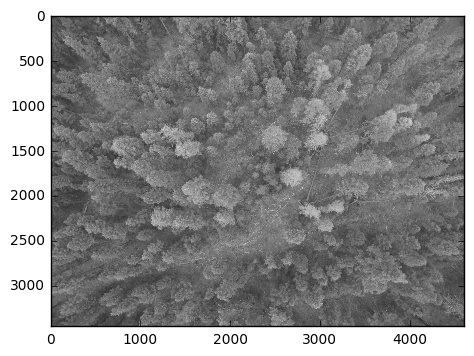

In [73]:
# create image as gray scale
# http://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
# this throws "AttributeError: 'str' object has no attribute 'ndim'" error
# image_gs = mh.colors.rgb2gray(image) #, dtype=np.uint8)
from PIL import Image
image_gs = Image.open(image).convert('LA')
plt.imshow(image_gs)
plt.show()

- Filtering for the mean seems to highlight old & current attack trees 
- Strips the live tree rgb information?
- Could one then apply a density filter on defined features?

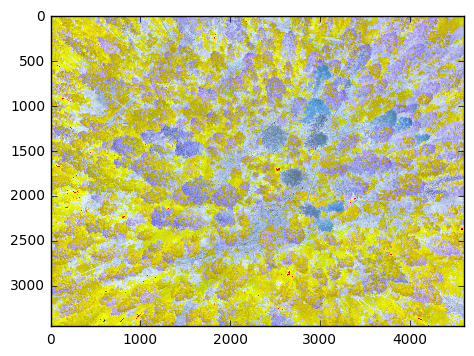

In [74]:
# create image filtered for mean
image_rgb_mean = image_rgb - image_rgb.mean()
plt.imshow(image_rgb_mean)
plt.show()

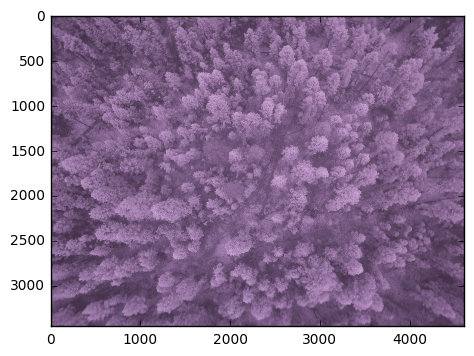

In [77]:
# import general current-attack nir image
image = image_nir_current_attack
image_nir = mh.imread(image)
# display the image
from matplotlib import pyplot as plt
plt.imshow(image_nir)
plt.show()

/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.4/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


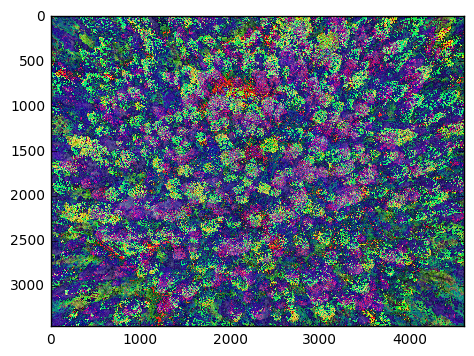

In [78]:
# create image filtered for NVDI
# not accurate because RGB & NIR attack images are not exact overlapping images
image_nvdi = (image_nir - image_rgb)/(image_nir + image_rgb)
plt.imshow(image_nvdi)
plt.show()